# Cluster 1 (Birmingham) Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import clustered data set
df_all = pd.read_csv('clustered_data.csv')

In [3]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4119 non-null   int64  
 1   distance        4119 non-null   float64
 2   OrderID         4119 non-null   int64  
 3   WebsiteID       4119 non-null   int64  
 4   OrderDate       4119 non-null   object 
 5   Courier         4119 non-null   object 
 6   ProductsExVAT   4119 non-null   float64
 7   DeliveryExVAT   4119 non-null   float64
 8   DateDespatched  4119 non-null   object 
 9   DeliveryCost    4119 non-null   float64
 10  Weight          4119 non-null   float64
 11  Volume (m3)     4119 non-null   float64
 12  Pallets         4119 non-null   float64
 13  id              4119 non-null   int64  
 14  Outward Code    4119 non-null   object 
 15  latitude        4119 non-null   float64
 16  longitude       4119 non-null   float64
 17  Cluster Label   4119 non-null   i

In [4]:
df_all.head()

,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label
0,0,26.84,2295440,7700,2023-04-18,MFS,375.40,0.00,2023-04-18,34.46,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,1
1,1,26.84,2277415,67940,2023-03-28,DX Freight,236.61,0.00,2023-03-28,16.45,33.30,0.959000,0.473039,766,DY6,52.496759,-2.173682,1
2,2,26.84,2279524,67940,2023-03-30,DX Freight,70.58,13.20,2023-03-30,11.79,21.80,0.209100,0.222222,766,DY6,52.496759,-2.173682,1
3,3,26.84,2275231,483789,2023-03-27,DX Express,76.95,7.22,2023-03-27,6.81,17.77,0.040200,0.030342,766,DY6,52.496759,-2.173682,1
4,4,26.84,2285334,483789,2023-04-05,DX Express,147.30,0.00,2023-04-05,11.46,34.70,0.100552,0.052361,766,DY6,52.496759,-2.173682,1


In [5]:
df_all['OrderDate']=pd.to_datetime(df_all['OrderDate'],format='%Y-%m-%d')
df_all['DateDespatched']=pd.to_datetime(df_all['DateDespatched'],format='%Y-%m-%d')

In [6]:
# Extract cluster 1 data
df_c1=df_all[df_all['Cluster Label']==1]

In [7]:
# Check df_c1 and unique values of cluster label to confirm we have the right dataset
df_c1.info()
df_c1['Cluster Label'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 4116
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      1285 non-null   int64         
 1   distance        1285 non-null   float64       
 2   OrderID         1285 non-null   int64         
 3   WebsiteID       1285 non-null   int64         
 4   OrderDate       1285 non-null   datetime64[ns]
 5   Courier         1285 non-null   object        
 6   ProductsExVAT   1285 non-null   float64       
 7   DeliveryExVAT   1285 non-null   float64       
 8   DateDespatched  1285 non-null   datetime64[ns]
 9   DeliveryCost    1285 non-null   float64       
 10  Weight          1285 non-null   float64       
 11  Volume (m3)     1285 non-null   float64       
 12  Pallets         1285 non-null   float64       
 13  id              1285 non-null   int64         
 14  Outward Code    1285 non-null   object        
 15  lati

array([1], dtype=int64)

In [8]:
# To calcuate the daily averages, first count the no. of working days (weekends and bank holidays excluded)

import datetime
df_c1['weekday'] = df_c1['DateDespatched'].apply(lambda x: x.weekday())

# Check the dates and days of a week in the data
print(df_c1['DateDespatched'].unique())
print(df_c1['weekday'].unique())
df_c1.head()

['2023-04-18T00:00:00.000000000' '2023-03-28T00:00:00.000000000'
 '2023-03-30T00:00:00.000000000' '2023-03-27T00:00:00.000000000'
 '2023-04-05T00:00:00.000000000' '2023-04-14T00:00:00.000000000'
 '2023-04-21T00:00:00.000000000' '2023-04-04T00:00:00.000000000'
 '2023-04-13T00:00:00.000000000' '2023-04-19T00:00:00.000000000'
 '2023-04-20T00:00:00.000000000' '2023-04-17T00:00:00.000000000'
 '2023-04-12T00:00:00.000000000' '2023-03-31T00:00:00.000000000'
 '2023-03-29T00:00:00.000000000' '2023-04-03T00:00:00.000000000'
 '2023-04-11T00:00:00.000000000' '2023-04-06T00:00:00.000000000'
 '2023-04-24T00:00:00.000000000' '2023-04-02T00:00:00.000000000'
 '2023-04-10T00:00:00.000000000']
[1 3 0 2 4 6]


C:\Users\pawel\AppData\Local\Temp/ipykernel_27752/3629816580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1['weekday'] = df_c1['DateDespatched'].apply(lambda x: x.weekday())


,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label,weekday
0,0,26.84,2295440,7700,2023-04-18,MFS,375.40,0.00,2023-04-18,34.46,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,1,1
1,1,26.84,2277415,67940,2023-03-28,DX Freight,236.61,0.00,2023-03-28,16.45,33.30,0.959000,0.473039,766,DY6,52.496759,-2.173682,1,1
2,2,26.84,2279524,67940,2023-03-30,DX Freight,70.58,13.20,2023-03-30,11.79,21.80,0.209100,0.222222,766,DY6,52.496759,-2.173682,1,3
3,3,26.84,2275231,483789,2023-03-27,DX Express,76.95,7.22,2023-03-27,6.81,17.77,0.040200,0.030342,766,DY6,52.496759,-2.173682,1,0
4,4,26.84,2285334,483789,2023-04-05,DX Express,147.30,0.00,2023-04-05,11.46,34.70,0.100552,0.052361,766,DY6,52.496759,-2.173682,1,2


In [9]:
# Drop rows that fall on a weekend (weekday value 5 & 6), and Easter Bank holidays (Apr 7th & 10th)
df_wd = df_c1.loc[~((df_c1['weekday']==5) | (df_c1['weekday']==6))]

# Drop easter bank holidays April 7th & 10th
df_wd=df_wd[~df_wd['DateDespatched'].isin([pd.Timestamp('20230407'), pd.Timestamp('20230410')])]


# Confirm they've been dropped
print(df_wd['DateDespatched'].unique())
print(df_wd['weekday'].unique())

['2023-04-18T00:00:00.000000000' '2023-03-28T00:00:00.000000000'
 '2023-03-30T00:00:00.000000000' '2023-03-27T00:00:00.000000000'
 '2023-04-05T00:00:00.000000000' '2023-04-14T00:00:00.000000000'
 '2023-04-21T00:00:00.000000000' '2023-04-04T00:00:00.000000000'
 '2023-04-13T00:00:00.000000000' '2023-04-19T00:00:00.000000000'
 '2023-04-20T00:00:00.000000000' '2023-04-17T00:00:00.000000000'
 '2023-04-12T00:00:00.000000000' '2023-03-31T00:00:00.000000000'
 '2023-03-29T00:00:00.000000000' '2023-04-03T00:00:00.000000000'
 '2023-04-11T00:00:00.000000000' '2023-04-06T00:00:00.000000000'
 '2023-04-24T00:00:00.000000000']
[1 3 0 2 4]


In [10]:
# Count number of days ex weekend and bank holidays
n=df_wd['DateDespatched'].nunique()

n

19

### Daily no. of deliveries and cost per courier

In [11]:
# Count how many orders the couriers delivered over the time period
courier_c1=pd.DataFrame(df_wd.groupby(['Courier'],as_index=False)['OrderID'].count())

In [12]:
courier_c1

,Courier,OrderID
0,DX Express,474
1,DX Freight,460
2,MFS,321
3,Split,28


In [13]:
# Rename OrderID column to 'Order Count'
courier_c1.rename(columns = {'OrderID':'Order Count'}, inplace = True)

# Add an additional column to calculate percentage of number of orders.
courier_c1['% Total'] = (courier_c1['Order Count']/courier_c1['Order Count'].sum()*100).round(2)

# Add daily averages by using number of days n=19
courier_c1['Daily Order Count'] = (courier_c1['Order Count']/n).round()

# Sort DataFrame.
courier_c1.sort_values(by='Daily Order Count',ascending=False)

,Courier,Order Count,% Total,Daily Order Count
0,DX Express,474,36.94,25.0
1,DX Freight,460,35.85,24.0
2,MFS,321,25.02,17.0
3,Split,28,2.18,1.0


In [14]:
# Total cost (£) per courier over the time period
cost_c1=pd.DataFrame(df_wd.groupby(['Courier'],as_index=False)['DeliveryCost'].sum())

In [15]:
cost_c1

,Courier,DeliveryCost
0,DX Express,3582.20
1,DX Freight,9472.27
2,MFS,19268.05
3,Split,2559.30


In [16]:
# Add an additional column to calculate daily average.
cost_c1['Daily Average Cost'] = (cost_c1['DeliveryCost']/n).round()

# Sort DataFrame.
cost_c1.sort_values(by='Daily Average Cost',ascending=False)

,Courier,DeliveryCost,Daily Average Cost
2,MFS,19268.05,1014.0
1,DX Freight,9472.27,499.0
0,DX Express,3582.20,189.0
3,Split,2559.30,135.0


In [17]:
### Distance Travelled per Courier (miles)
distance_c1=pd.DataFrame(df_wd.groupby(['Courier'],as_index=False)['distance'].sum())
distance_c1['Daily Average Distance'] = (distance_c1['distance']/n).round()
distance_c1

,Courier,distance,Daily Average Distance
0,DX Express,11579.72,609.0
1,DX Freight,11075.84,583.0
2,MFS,7511.70,395.0
3,Split,624.26,33.0


In [18]:
### Cost per mile
DisCost=pd.merge(cost_c1, distance_c1, on = 'Courier', how = 'outer')
DisCost['Cost per Mile']=(DisCost['DeliveryCost']/DisCost['distance']).round(2)
DisCost

,Courier,DeliveryCost,Daily Average Cost,distance,Daily Average Distance,Cost per Mile
0,DX Express,3582.20,189.0,11579.72,609.0,0.31
1,DX Freight,9472.27,499.0,11075.84,583.0,0.86
2,MFS,19268.05,1014.0,7511.70,395.0,2.57
3,Split,2559.30,135.0,624.26,33.0,4.10


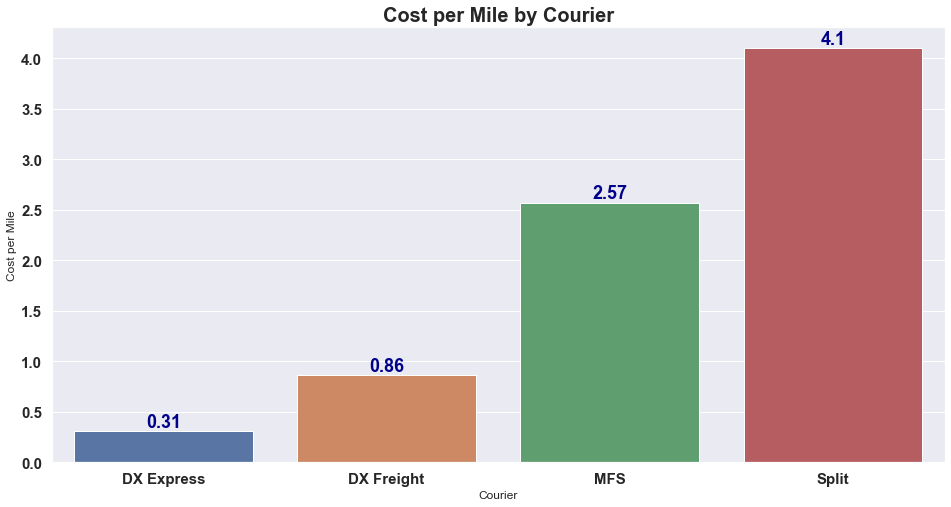

In [19]:
import seaborn as sns
# Set figure size.
c = sns.set(rc={'figure.figsize':(16, 8)})

# Create barplot.
c = sns.barplot(data=DisCost,x='Courier',y='Cost per Mile')
for container in c.containers:
    c.bar_label(container,fontsize=18,color='darkblue',fontweight='bold')

# Set Title.
c.set_title("Cost per Mile by Courier",fontsize=20,fontweight='bold')
plt.xticks(size=15,fontweight='bold')
plt.yticks(size=15,fontweight='bold')

# displaying chart.
plt.show()

### Size/pallets/weight of deliveries (per day)

In [20]:
df_wd.head()

,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label,weekday
0,0,26.84,2295440,7700,2023-04-18,MFS,375.40,0.00,2023-04-18,34.46,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,1,1
1,1,26.84,2277415,67940,2023-03-28,DX Freight,236.61,0.00,2023-03-28,16.45,33.30,0.959000,0.473039,766,DY6,52.496759,-2.173682,1,1
2,2,26.84,2279524,67940,2023-03-30,DX Freight,70.58,13.20,2023-03-30,11.79,21.80,0.209100,0.222222,766,DY6,52.496759,-2.173682,1,3
3,3,26.84,2275231,483789,2023-03-27,DX Express,76.95,7.22,2023-03-27,6.81,17.77,0.040200,0.030342,766,DY6,52.496759,-2.173682,1,0
4,4,26.84,2285334,483789,2023-04-05,DX Express,147.30,0.00,2023-04-05,11.46,34.70,0.100552,0.052361,766,DY6,52.496759,-2.173682,1,2


In [21]:
size_c1=df_wd[['Courier', 'DeliveryCost','Weight','Volume (m3)','Pallets']]
size_c1.head()

,Courier,DeliveryCost,Weight,Volume (m3),Pallets
0,MFS,34.46,110.00,0.225000,0.200000
1,DX Freight,16.45,33.30,0.959000,0.473039
2,DX Freight,11.79,21.80,0.209100,0.222222
3,DX Express,6.81,17.77,0.040200,0.030342
4,DX Express,11.46,34.70,0.100552,0.052361


In [22]:
size_total=size_c1.groupby('Courier').sum()
size_total

,DeliveryCost,Weight,Volume (m3),Pallets
Courier,,,,
DX Express,3582.20,6766.44,32.567235,26.799213
DX Freight,9472.27,19994.82,353.837391,211.922071
MFS,19268.05,92638.32,639.548612,422.787604
Split,2559.30,10293.42,152.514792,89.531612


In [23]:
size_total['DCost per kg']=(size_total['DeliveryCost']/size_total['Weight']).round(2)
size_total['DCost per m3']=(size_total['DeliveryCost']/size_total['Volume (m3)']).round(2)
size_total['Daily Weight']=(size_total['Weight']/n).round(2)
size_total['Daily Volume']=(size_total['Volume (m3)']/n).round(2)
size_total['Daily Pallets']=(size_total['Pallets']/n).round(2)
size_total.head()

,DeliveryCost,Weight,Volume (m3),Pallets,DCost per kg,DCost per m3,Daily Weight,Daily Volume,Daily Pallets
Courier,,,,,,,,,
DX Express,3582.20,6766.44,32.567235,26.799213,0.53,109.99,356.13,1.71,1.41
DX Freight,9472.27,19994.82,353.837391,211.922071,0.47,26.77,1052.36,18.62,11.15
MFS,19268.05,92638.32,639.548612,422.787604,0.21,30.13,4875.70,33.66,22.25
Split,2559.30,10293.42,152.514792,89.531612,0.25,16.78,541.76,8.03,4.71
